In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [ ]:
import os
os.listdir()


['.config', 'leadbeater_suzuki_dataset.csv.csv', 'sample_data']

In [ ]:
import os
os.rename(
    "leadbeater_suzuki_dataset.csv.csv",
    "leadbeater_suzuki_dataset.csv"
)


In [ ]:
data = pd.read_csv("leadbeater_suzuki_dataset.csv")
data


,TBAB_equiv,Na2CO3_equiv,Temperature,Time,Yield
0,1.00,3.80,110,10,90
1,0.50,3.80,110,10,92
2,0.25,3.80,110,10,91
3,0.25,1.90,110,10,92
4,0.25,0.95,110,10,92
5,0.25,0.47,110,10,86


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0    TBAB_equiv   6 non-null      float64
 1   Na2CO3_equiv  6 non-null      float64
 2   Temperature   6 non-null      int64  
 3    Time         6 non-null      int64  
 4    Yield        6 non-null      int64  
dtypes: float64(2), int64(3)
memory usage: 372.0 bytes


In [ ]:
print(data.columns)


Index([' TBAB_equiv', 'Na2CO3_equiv', 'Temperature', ' Time', ' Yield'], dtype='object')


In [ ]:
# Remove leading/trailing spaces
data.columns = data.columns.str.strip()

# Check again
print(data.columns)


Index(['TBAB_equiv', 'Na2CO3_equiv', 'Temperature', 'Time', 'Yield'], dtype='object')


In [ ]:
X = data[['TBAB_equiv','Na2CO3_equiv','Temperature','Time']]
y = data['Yield']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Features (input) aur target (output)
X = data[['TBAB_equiv','Na2CO3_equiv','Temperature','Time']]
y = data['Yield']

# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

# Random Forest model create + train
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
pred = model.predict(X_test)

# Mean Absolute Error calculate
mae = mean_absolute_error(y_test, pred)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 1.0


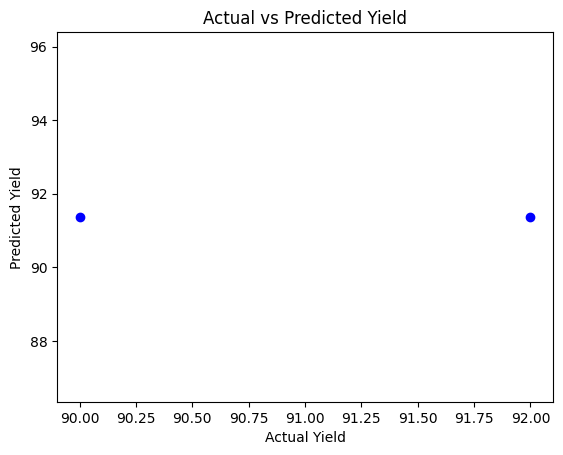

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred, color='blue')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()


In [ ]:
for name, imp in zip(X.columns, model.feature_importances_):
    print(name, ":", round(imp, 3))


TBAB_equiv : 0.0
Na2CO3_equiv : 1.0
Temperature : 0.0
Time : 0.0


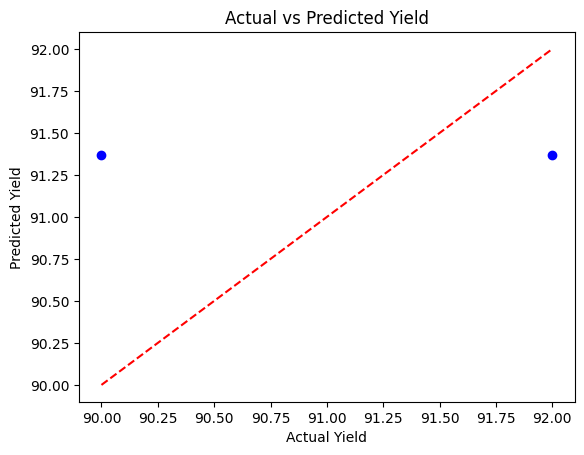

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(y_test, pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Yield")
plt.ylabel("Predicted Yield")
plt.title("Actual vs Predicted Yield")
plt.show()
